In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# 부산시 구별 데이터
cal = pd.read_csv('/content/busan_arts_finance_calculate.csv')
df = pd.DataFrame(cal)
districts = df.iloc[:, 0]

index = pd.DataFrame(districts)
index

,구
0,강서구
1,금정구
2,기장구
3,남구
4,동구
5,동래구
6,부산진구
7,북구
8,사상구
9,사하구


In [3]:
# 계산
index['cul_budget']=(df['cul_budget']/df['avg_cul_budget'])*100
index['cul_budget']=index['cul_budget'].round(2)

index['cna_budget']=(df['cna_budget']/df['avg_cna_budget'])*100
index['cna_budget']=index['cna_budget'].round(2)

index['cul_government']=(df['cul_government']/df['avg_cul_government'])*100
index['cul_government']=index['cul_government'].round(2)

index['cna_budget_2']=(df['cna_budget_2']/df['avg_cna_budget_2'])*100
index['cna_budget_2']=index['cna_budget_2'].round(2)

index['donation']=(df['donation']/df['avg_donation'])*100
index['donation']=index['donation'].round(2)

index

,구,cul_budget,cna_budget,cul_government,cna_budget_2,donation
0,강서구,82.84,79.16,97.85,61.98,77.19
1,금정구,344.92,75.79,317.03,14.25,46.75
2,기장구,333.33,266.74,223.03,51.91,100.00
3,남구,84.08,266.74,74.31,205.79,100.00
4,동구,78.76,82.38,116.41,340.85,227.79
5,동래구,34.24,43.34,36.92,82.11,188.47
6,부산진구,52.75,96.80,32.67,119.04,41.55
7,북구,85.90,45.64,71.90,34.46,74.20
8,사상구,84.66,97.58,81.90,74.76,110.56
9,사하구,41.86,70.84,33.54,109.78,100.00


In [4]:
# 예산 지수
index['budget_index'] = (index['cul_budget']+index['cna_budget']+index['cul_government']+index['cna_budget_2'])/4
index['budget_index'] = index['budget_index'].round(2)

# 기부 지수
index['donation_index'] = index['donation']

# 예술 재정 지수
index['busan_arts_finance_index'] = (index['budget_index']+index['donation_index'])/2
index['busan_arts_finance_index'] = index['busan_arts_finance_index'].round(2)

index

,구,cul_budget,cna_budget,cul_government,cna_budget_2,donation,budget_index,donation_index,busan_arts_finance_index
0,강서구,82.84,79.16,97.85,61.98,77.19,80.46,77.19,78.82
1,금정구,344.92,75.79,317.03,14.25,46.75,188.00,46.75,117.38
2,기장구,333.33,266.74,223.03,51.91,100.00,218.75,100.00,159.38
3,남구,84.08,266.74,74.31,205.79,100.00,157.73,100.00,128.86
4,동구,78.76,82.38,116.41,340.85,227.79,154.60,227.79,191.20
5,동래구,34.24,43.34,36.92,82.11,188.47,49.15,188.47,118.81
6,부산진구,52.75,96.80,32.67,119.04,41.55,75.32,41.55,58.43
7,북구,85.90,45.64,71.90,34.46,74.20,59.48,74.20,66.84
8,사상구,84.66,97.58,81.90,74.76,110.56,84.72,110.56,97.64
9,사하구,41.86,70.84,33.54,109.78,100.00,64.00,100.00,82.00


In [5]:
index['cul_budget'].describe()

count     16.000000
mean     100.000625
std       95.116064
min       34.240000
25%       51.865000
50%       77.430000
75%       84.225000
max      344.920000
Name: cul_budget, dtype: float64

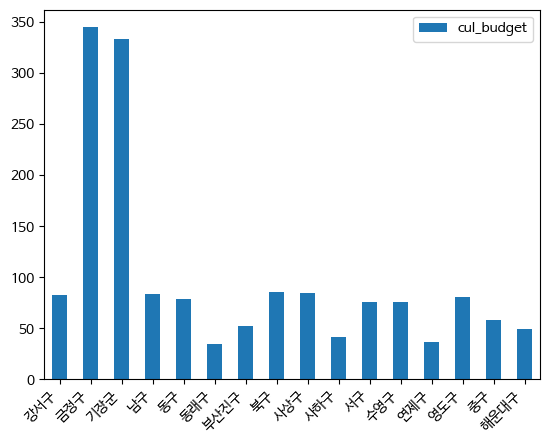

In [6]:
# 폰트 설정
plt.rcParams['font.family'] = 'NanumBarunGothic'

index['cul_budget'].plot(kind='bar')
plt.legend(['cul_budget'])

# x축에 구별 이름 추가
districts = ['강서구', '금정구', '기장군', '남구', '동구', '동래구', '부산진구', '북구', '사상구', '사하구', '서구', '수영구', '연제구', '영도구', '중구', '해운대구']
plt.xticks(range(len(districts)), districts, rotation=45, ha='right')

plt.show()

In [7]:
index['cna_budget'].describe()

count     16.00000
mean     100.00000
std       72.08325
min       35.31000
25%       52.61500
50%       79.67500
75%       96.99500
max      266.74000
Name: cna_budget, dtype: float64

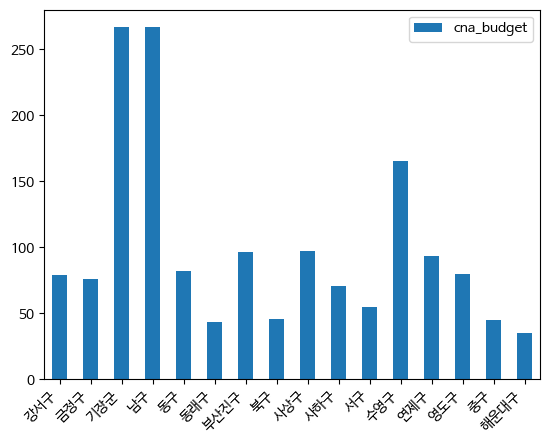

In [8]:
# 폰트 설정
plt.rcParams['font.family'] = 'NanumBarunGothic'

index['cna_budget'].plot(kind='bar')
plt.legend(['cna_budget'])

# x축에 구별 이름 추가
districts = ['강서구', '금정구', '기장군', '남구', '동구', '동래구', '부산진구', '북구', '사상구', '사하구', '서구', '수영구', '연제구', '영도구', '중구', '해운대구']
plt.xticks(range(len(districts)), districts, rotation=45, ha='right')

plt.show()

In [9]:
index['cul_government'].describe()

count     16.000000
mean     100.186875
std       77.481671
min       29.230000
25%       36.075000
50%       88.615000
75%      107.140000
max      317.030000
Name: cul_government, dtype: float64

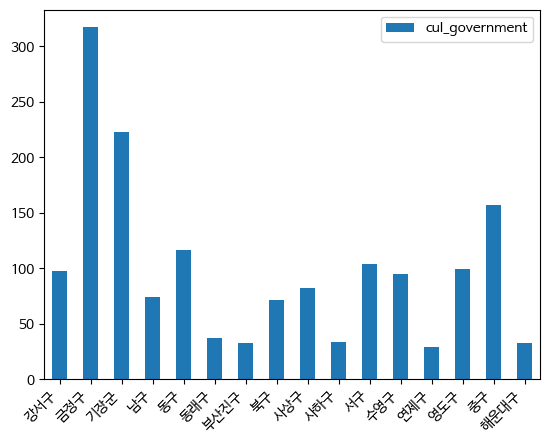

In [10]:
# 폰트 설정
plt.rcParams['font.family'] = 'NanumBarunGothic'

index['cul_government'].plot(kind='bar')
plt.legend(['cul_government'])

# x축에 구별 이름 추가
districts = ['강서구', '금정구', '기장군', '남구', '동구', '동래구', '부산진구', '북구', '사상구', '사하구', '서구', '수영구', '연제구', '영도구', '중구', '해운대구']
plt.xticks(range(len(districts)), districts, rotation=45, ha='right')

plt.show()

In [11]:
index['cna_budget_2'].describe()

count     16.000000
mean      99.985625
std       83.031453
min       14.250000
25%       49.357500
50%       69.425000
75%      124.780000
max      340.850000
Name: cna_budget_2, dtype: float64

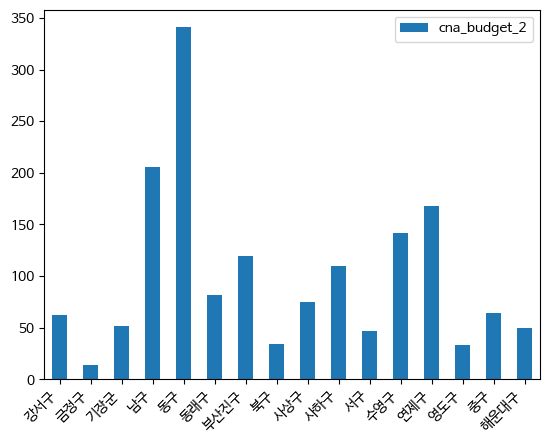

In [12]:
# 폰트 설정
plt.rcParams['font.family'] = 'NanumBarunGothic'

index['cna_budget_2'].plot(kind='bar')
plt.legend(['cna_budget_2'])

# x축에 구별 이름 추가
districts = ['강서구', '금정구', '기장군', '남구', '동구', '동래구', '부산진구', '북구', '사상구', '사하구', '서구', '수영구', '연제구', '영도구', '중구', '해운대구']
plt.xticks(range(len(districts)), districts, rotation=45, ha='right')

plt.show()

In [13]:
index['donation'].describe()

count     16.000000
mean     100.000000
std       61.946947
min        7.420000
25%       67.337500
50%      100.000000
75%      121.320000
max      227.790000
Name: donation, dtype: float64

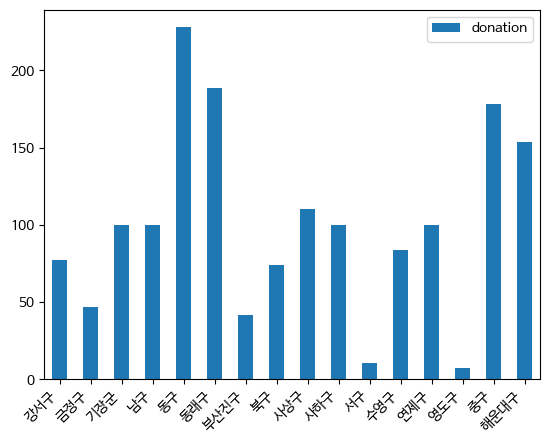

In [14]:
# 폰트 설정
plt.rcParams['font.family'] = 'NanumBarunGothic'

index['donation'].plot(kind='bar')
plt.legend(['donation'])

# x축에 구별 이름 추가
districts = ['강서구', '금정구', '기장군', '남구', '동구', '동래구', '부산진구', '북구', '사상구', '사하구', '서구', '수영구', '연제구', '영도구', '중구', '해운대구']
plt.xticks(range(len(districts)), districts, rotation=45, ha='right')

plt.show()

In [15]:
index['budget_index'].describe()

count     16.000000
mean     100.043125
std       52.240145
min       41.840000
25%       68.860000
50%       80.800000
75%      128.410000
max      218.750000
Name: budget_index, dtype: float64

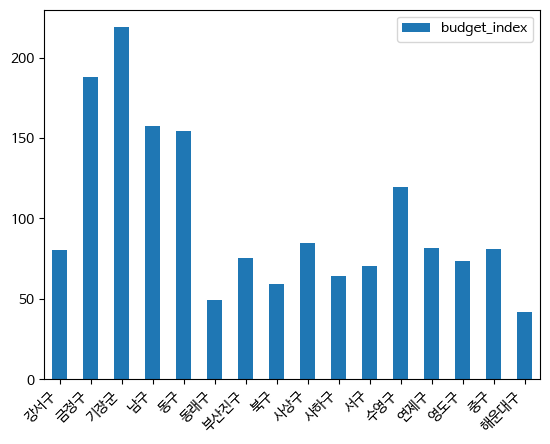

In [16]:
# 폰트 설정
plt.rcParams['font.family'] = 'NanumBarunGothic'

index['budget_index'].plot(kind='bar')
plt.legend(['budget_index'])

# x축에 구별 이름 추가
districts = ['강서구', '금정구', '기장군', '남구', '동구', '동래구', '부산진구', '북구', '사상구', '사하구', '서구', '수영구', '연제구', '영도구', '중구', '해운대구']
plt.xticks(range(len(districts)), districts, rotation=45, ha='right')

plt.show()

In [17]:
index['donation_index'].describe()

count     16.000000
mean     100.000000
std       61.946947
min        7.420000
25%       67.337500
50%      100.000000
75%      121.320000
max      227.790000
Name: donation_index, dtype: float64

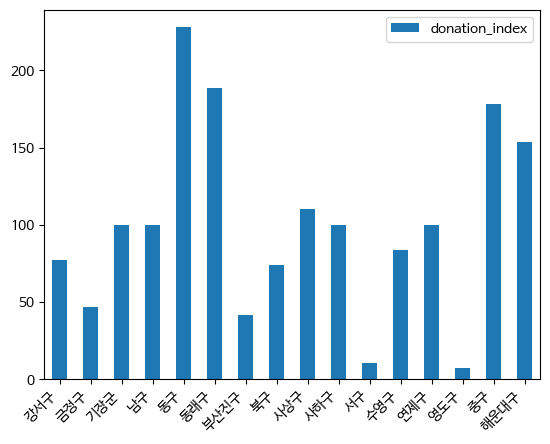

In [18]:
# 폰트 설정
plt.rcParams['font.family'] = 'NanumBarunGothic'

index['donation_index'].plot(kind='bar')
plt.legend(['donation_index'])

# x축에 구별 이름 추가
districts = ['강서구', '금정구', '기장군', '남구', '동구', '동래구', '부산진구', '북구', '사상구', '사하구', '서구', '수영구', '연제구', '영도구', '중구', '해운대구']
plt.xticks(range(len(districts)), districts, rotation=45, ha='right')

plt.show()

In [19]:
index['busan_arts_finance_index'].describe()

count     16.00000
mean     100.02125
std       40.82404
min       40.44000
25%       75.82500
50%       97.68000
75%      121.32250
max      191.20000
Name: busan_arts_finance_index, dtype: float64

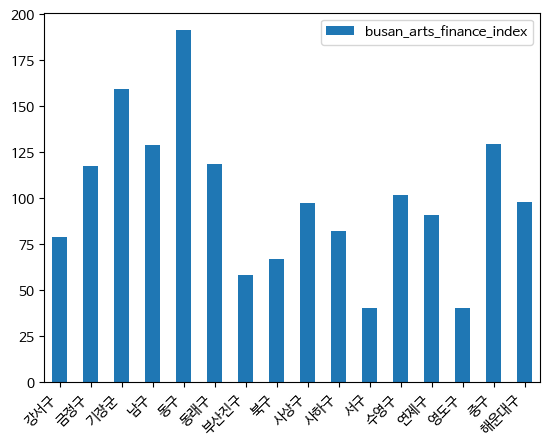

In [20]:
# 폰트 설정
plt.rcParams['font.family'] = 'NanumBarunGothic'

index['busan_arts_finance_index'].plot(kind='bar')
plt.legend(['busan_arts_finance_index'])

# x축에 구별 이름 추가
districts = ['강서구', '금정구', '기장군', '남구', '동구', '동래구', '부산진구', '북구', '사상구', '사하구', '서구', '수영구', '연제구', '영도구', '중구', '해운대구']
plt.xticks(range(len(districts)), districts, rotation=45, ha='right')

plt.show()

In [21]:
index.to_csv('busan_arts_finance_index.csv', encoding='utf-8-sig', index=False)